In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

## Check rollers accomplishes desired functionality of memory with decay

In [2]:
def decay_value(value_last: float, timestamp_last: float, window_last: float, now: float) -> float:
    dt = now - timestamp_last
    if (dt >= window_last or window_last == 0):
        return 0
    
    value_last -= (value_last * dt) / window_last
    return value_last

In [3]:
# has gone 30% the way through window
decay_value(1, 1600, 1600, 2080) == 0.7

True

In [4]:
# has gone 87.5% the way through window
decay_value(1, 1600, 1600, 3000) == 0.125

True

In [5]:
# has gone 100% the way through window
decay_value(1, 1600, 1600, 3200) == 0

True

In [13]:
def decay_over_window(value_last: float, timestamp_last: float, window_last: float,
                      value: float, now: float, window: float) -> (float, float):
    # value now is value last decayed plus new value
    value_last = decay_value(value_last, timestamp_last, window_last, now)
    value_now = value_last + value
    
    # window now is weighted average of last window and new window
    # with weights as values being decayed in each respective window
    numerator = value_last * (window_last - (now - timestamp_last)) + value * window
    denominator = value_now
    window_now = numerator / denominator
    
    return value_now, window_now

In [16]:
# should reduce to the 30% the way through window case
decay_over_window(1, 1600, 1600, 0, 2080, 1600) == (0.7, 1600 * 0.7)

True

In [28]:
# should change to account for new value coming into 30% case
decay_over_window(1, 1600, 1600, 0.5, 2080, 1600) == (1.2, (0.5 * 1600 + 0.7 * 1600 * 0.7) / 1.2)

True

In [169]:
# Plot value decay over time
window = 1

value = 1
timestamp = 1.2
now = 1.6

ts = np.arange(now, now*2, 0.001)

In [170]:
decayed_vals = np.array([ decay_value(value, timestamp, window, t) for t in ts ])
decayed_vals

array([0.6  , 0.599, 0.598, ..., 0.   , 0.   , 0.   ])

Text(0, 0.5, 'value')

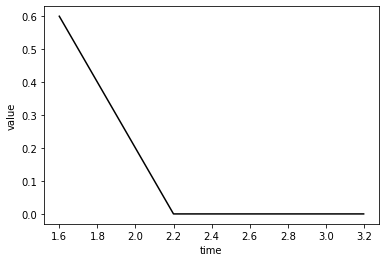

In [171]:
plt.plot(ts, decayed_vals, c='k')

plt.xlabel('time')
plt.ylabel('value')

## And now with memory of a prior value decaying over time

In [200]:
pv = 0.25
pw = 1.0

print('window', window)
print('(now - timestamp)/window', (now-timestamp)/window)

decayed_vals_w_memory = np.array([ decay_value(decay_over_window(value, timestamp, window, value*pv, now, window*pw)[0], now, decay_over_window(value, timestamp, window, value*pv, now, window*pw)[1], t) for t in ts ])
decayed_vals_w_memory

window 1
(now - timestamp)/window 0.40000000000000013


array([0.85      , 0.84881557, 0.84763115, ..., 0.        , 0.        ,
       0.        ])

In [201]:
decayed_windows_w_memory = np.array([ decay_over_window(value, timestamp, window, value*pv, now, window*pw)[1] for t in ts ])
decayed_windows_w_memory

array([0.71764706, 0.71764706, 0.71764706, ..., 0.71764706, 0.71764706,
       0.71764706])

Text(0, 0.5, 'value')

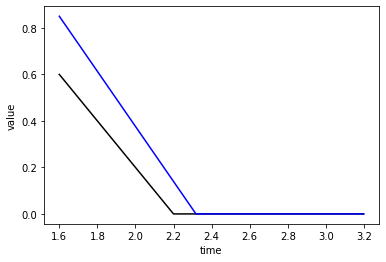

In [202]:
plt.plot(ts, decayed_vals, c='k')
plt.plot(ts, decayed_vals_w_memory, c='b')

plt.xlabel('time')
plt.ylabel('value')

Text(0, 0.5, 'time')

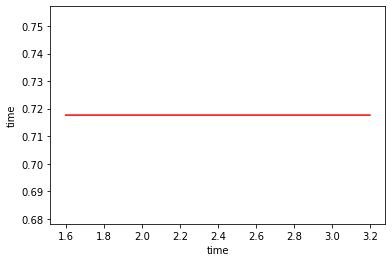

In [203]:
plt.plot(ts, decayed_windows_w_memory, c='r')

plt.xlabel('time')
plt.ylabel('time')

In [64]:
# higher the value of the new decay, the more weight given to future window over which to decay it